In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts


In [4]:
# Files locations placed into variables

ride_data_load = 'Resources/ride_data.csv'
city_data_load = 'Resources/city_data.csv'

In [5]:
city_data_df = pd.read_csv(city_data_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [6]:
ride_data_df = pd.read_csv(ride_data_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [7]:
city_data_df.count() 

city            120
driver_count    120
type            120
dtype: int64

In [8]:
city_data_df.isnull().sum() 

city            0
driver_count    0
type            0
dtype: int64

In [9]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [10]:
# Unique values for cities column

city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [11]:
sum(city_data_df['type']=='Urban')


66

In [12]:
sum(city_data_df['type']=='Suburban')

36

In [13]:
sum(city_data_df['type']=='Rural')

18

In [14]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [15]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [16]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [17]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on=['city', 'city'])

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [18]:
# Create new dataframe from PyBer data frame to filter down to all Urban cities

urban_cities_df = pyber_data_df[pyber_data_df['type']=='Urban']
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [19]:
suburban_cities_df = pyber_data_df[pyber_data_df['type']=='Suburban']
rural_cities_df = pyber_data_df[pyber_data_df['type']=='Rural']

rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [20]:
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']

urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [21]:
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

In [22]:
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']

urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [23]:
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

In [24]:
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [25]:
average_fare = pyber_data_df.groupby(['city']).mean()['fare']
average_fare

city
Amandaburgh         24.641667
Barajasview         25.332273
Barronchester       36.422500
Bethanyland         32.956111
Bradshawfurt        40.064000
                      ...    
West Robert         25.123871
West Samuelburgh    21.767600
Williamsonville     31.875000
Williamsstad        24.362174
Williamsview        26.599000
Name: fare, Length: 120, dtype: float64

In [26]:
driver_count = city_data_df.groupby(['city']).sum()['driver_count']
driver_count

city
Amandaburgh         12
Barajasview         26
Barronchester       11
Bethanyland         22
Bradshawfurt         7
                    ..
West Robert         39
West Samuelburgh    73
Williamsonville      2
Williamsstad        59
Williamsview        46
Name: driver_count, Length: 120, dtype: int64

In [27]:
ride_count = pyber_data_df.groupby(['city']).count()['ride_id']
ride_count

city
Amandaburgh         18
Barajasview         22
Barronchester       16
Bethanyland         18
Bradshawfurt        10
                    ..
West Robert         31
West Samuelburgh    25
Williamsonville     14
Williamsstad        23
Williamsview        20
Name: ride_id, Length: 120, dtype: int64

In [28]:
total_fare = pyber_data_df.groupby(['type']).sum()['fare']
total_fare

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [29]:
driver_count.corr(average_fare, method='pearson')

-0.536838119222029

In [30]:
ride_count.corr(average_fare, method='pearson')

-0.5831877558667992

In [31]:
ride_count.corr(driver_count, method='pearson')

0.5191052305390097

In [32]:
urban_avg_drivers = urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_avg_drivers = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_avg_drivers = rural_cities_df.groupby(['city']).mean()['driver_count']

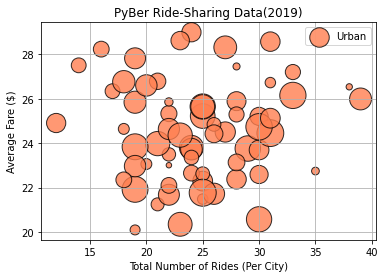

In [33]:
fig, ax = plt.subplots()

ax.scatter(urban_ride_count, 
        urban_avg_fare, 
        s=urban_avg_drivers * 10, 
        c='coral', 
        edgecolors='black', 
        linewidths=1, 
        alpha=0.8,
        label='Urban')
ax.set_title('PyBer Ride-Sharing Data(2019)')
ax.set_xlabel('Total Number of Rides (Per City)')
ax.set_ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

plt.show()

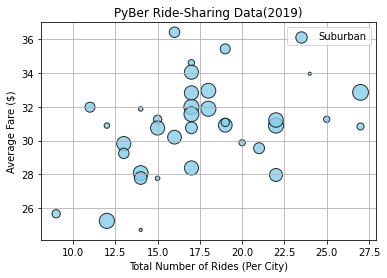

In [34]:
fig, ax = plt.subplots()

ax.scatter(suburban_ride_count, suburban_avg_fare, 
        s=suburban_avg_drivers * 10, 
        c='skyblue', 
        edgecolors='black', 
        linewidths=1, 
        alpha=0.8,
        label='Suburban')
ax.set_title('PyBer Ride-Sharing Data(2019)')
ax.set_xlabel('Total Number of Rides (Per City)')
ax.set_ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

plt.show()

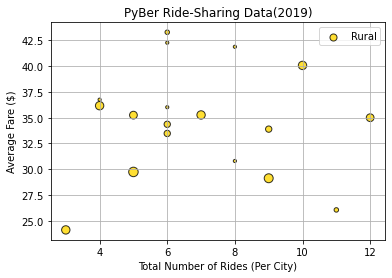

In [35]:
fig, ax = plt.subplots()

ax.scatter(rural_ride_count, rural_avg_fare, 
        s=rural_avg_drivers * 10, 
        c='gold', 
        edgecolors='black', 
        linewidths=1, 
        alpha=0.8,
        label='Rural')
ax.set_title('PyBer Ride-Sharing Data(2019)')
ax.set_xlabel('Total Number of Rides (Per City)')
ax.set_ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

plt.show()

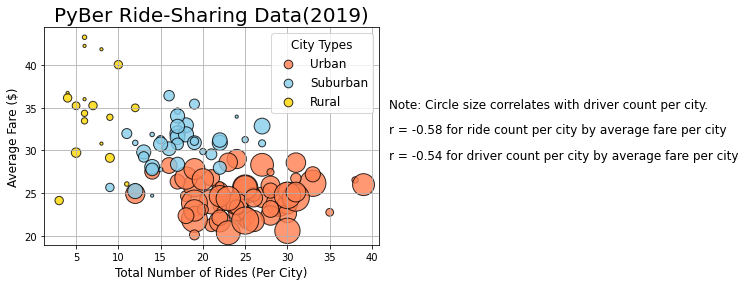

In [36]:
# Add all scatter plot code blocks into one cell to combine

fig, ax = plt.subplots()

ax.scatter(urban_ride_count, 
        urban_avg_fare, 
        s=urban_avg_drivers * 10, 
        c='coral', 
        edgecolors='black', 
        linewidths=1, 
        alpha=0.8,
        label='Urban')

ax.scatter(suburban_ride_count, suburban_avg_fare, 
        s=suburban_avg_drivers * 10, 
        c='skyblue', 
        edgecolors='black', 
        linewidths=1, 
        alpha=0.8,
        label='Suburban')

ax.scatter(rural_ride_count, rural_avg_fare, 
        s=rural_avg_drivers * 10, 
        c='gold', 
        edgecolors='black', 
        linewidths=1, 
        alpha=0.8,
        label='Rural')

# Provide context with a chart title and axes labels
ax.set_title('PyBer Ride-Sharing Data(2019)', fontsize=20)
ax.set_xlabel('Total Number of Rides (Per City)', fontsize=12)
ax.set_ylabel('Average Fare ($)', fontsize=12)
plt.grid(True)

# Add in the legend for bubble color identification
lgnd = plt.legend(fontsize='12', mode='Expanded',
            scatterpoints=1, loc='best', title='City Types')

lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.text(42, 35, 'Note: Circle size correlates with driver count per city.', fontsize='12')
plt.text(42, 32, 'r = -0.58 for ride count per city by average fare per city', fontsize='12')
plt.text(42, 29, 'r = -0.54 for driver count per city by average fare per city', fontsize='12')
plt.show()

In [37]:
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [38]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [39]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [40]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [41]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [42]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [43]:
round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(), 2), round(rural_ride_count.mean(), 2)

(24.62, 17.36, 6.94)

In [44]:
urban_ride_count.median(), suburban_ride_count.median(), rural_ride_count.median()

(24.0, 17.0, 6.0)

In [45]:
urban_ride_count.mode(), suburban_ride_count.mode(), rural_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [46]:
# Calculate measure of central tendency using numpy and scipy

mean_urban_ride_count = np.mean(urban_ride_count)
print(f'The mean for the ride counts of urban trips is {mean_urban_ride_count:.2f}.')

median_urban_ride_count = np.median(urban_ride_count)
print(f'The median for the ride counts of urban trips is {median_urban_ride_count}.')

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f'The mode for the ride counts of urban trips is {mode_urban_ride_count}.')



The mean for the ride counts of urban trips is 24.62.
The median for the ride counts of urban trips is 24.0.
The mode for the ride counts of urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [47]:
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f'The mean for the ride counts of suburban trips is {mean_suburban_ride_count:.2f}.')

median_suburban_ride_count = np.median(suburban_ride_count)
print(f'The median for the ride counts of suburban trips is {median_suburban_ride_count}.')

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f'The mode for the ride counts of suburban trips is {mode_suburban_ride_count}.')

The mean for the ride counts of suburban trips is 17.36.
The median for the ride counts of suburban trips is 17.0.
The mode for the ride counts of suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [48]:
mean_rural_ride_count = np.mean(rural_ride_count)
print(f'The mean for the ride counts of rural trips is {mean_rural_ride_count:.2f}.')

median_rural_ride_count = np.median(rural_ride_count)
print(f'The median for the ride counts of rural trips is {median_rural_ride_count}.')

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f'The mode for the ride counts of rural trips is {mode_rural_ride_count}.')

The mean for the ride counts of rural trips is 6.94.
The median for the ride counts of rural trips is 6.0.
The mode for the ride counts of rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [49]:
urban_fare = urban_cities_df['fare']

urban_fare.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [50]:
suburban_fare = suburban_cities_df['fare']
rural_fare = rural_cities_df['fare']

In [51]:
mean_urban_fare = np.mean(urban_fare)
print(f'The mean for the fare price of urban trips is {mean_urban_fare:.2f}.')

median_urban_fare = np.median(urban_fare)
print(f'The median for the fare price of urban trips is {median_urban_fare:.2f}.')

mode_urban_fare = sts.mode(urban_fare)
print(f'The mode for the fare price of urban trips is {mode_urban_fare}.')

The mean for the fare price of urban trips is 24.53.
The median for the fare price of urban trips is 24.64.
The mode for the fare price of urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [52]:
mean_suburban_fare = np.mean(suburban_fare)
print(f'The mean for the fare price of suburban trips is {mean_suburban_fare:.2f}.')

median_suburban_fare = np.median(suburban_fare)
print(f'The median for the fare price of suburban trips is {median_suburban_fare:.2f}.')

mode_suburban_fare = sts.mode(suburban_fare)
print(f'The mode for the fare price of suburban trips is {mode_suburban_fare}.')

The mean for the fare price of suburban trips is 30.97.
The median for the fare price of suburban trips is 30.75.
The mode for the fare price of suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [53]:
mean_rural_fare = np.mean(rural_fare)
print(f'The mean for the fare price of rural trips is {mean_rural_fare:.2f}.')

median_rural_fare = np.median(rural_fare)
print(f'The median for the fare price of rural trips is {median_rural_fare:.2f}.')

mode_rural_fare = sts.mode(rural_fare)
print(f'The mode for the fare price of rural trips is {mode_rural_fare}.')

The mean for the fare price of rural trips is 34.62.
The median for the fare price of rural trips is 37.05.
The mode for the fare price of rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [54]:
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']


In [55]:
mean_urban_drivers = np.mean(urban_drivers)
print(f'The mean for the fare price of rural trips is {mean_urban_drivers:.2f}.')

median_urban_drivers = np.median(urban_drivers)
print(f'The median for the fare price of rural trips is {median_urban_drivers:.2f}.')

mode_urban_drivers = sts.mode(urban_drivers)
print(f'The mode for the fare price of rural trips is {mode_urban_drivers}.')

The mean for the fare price of rural trips is 36.68.
The median for the fare price of rural trips is 37.00.
The mode for the fare price of rural trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [56]:
mean_suburban_drivers = np.mean(suburban_drivers)
print(f'The mean for the fare price of rural trips is {mean_suburban_drivers:.2f}.')

median_suburban_drivers = np.median(suburban_drivers)
print(f'The median for the fare price of rural trips is {median_suburban_drivers:.2f}.')

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f'The mode for the fare price of rural trips is {mode_suburban_drivers}.')

The mean for the fare price of rural trips is 13.71.
The median for the fare price of rural trips is 16.00.
The mode for the fare price of rural trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [57]:
mean_rural_drivers = np.mean(rural_drivers)
print(f'The mean for the drivers price of rural trips is {mean_rural_drivers:.2f}.')

median_rural_drivers = np.median(rural_drivers)
print(f'The median for the drivers price of rural trips is {median_rural_drivers:.2f}.')

mode_rural_drivers = sts.mode(rural_drivers)
print(f'The mode for the drivers price of rural trips is {mode_rural_drivers}.')

The mean for the drivers price of rural trips is 4.30.
The median for the drivers price of rural trips is 4.00.
The mode for the drivers price of rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


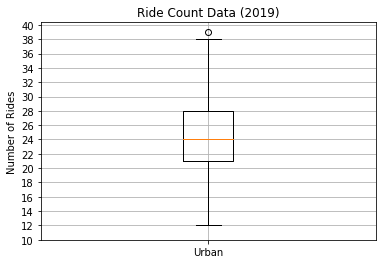

In [58]:
# Box and whisker plot for urban cities ride count

x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

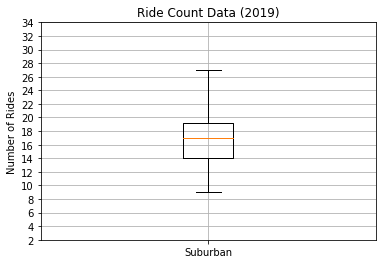

In [59]:
x_labels = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(2, 35, step=2.0))
ax.grid()
plt.show()

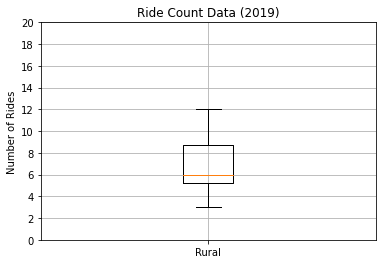

In [60]:
x_labels = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 21, step=2.0))
ax.grid()
plt.show()

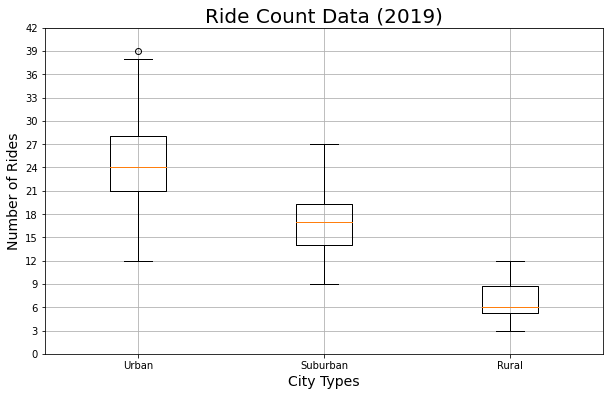

In [61]:
x_labels = ['Urban', 'Suburban', 'Rural']
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
plt.show()

In [62]:
# Get city name that matches our Urban 39 outlier

urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


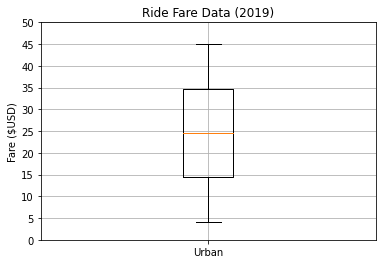

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [63]:
x_labels=['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_fare, labels=x_labels)
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print('Summary Statistics')
urban_fare.describe()

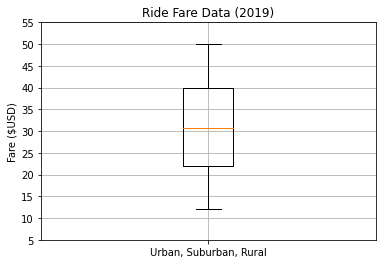

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [64]:
x_labels=['Urban, Suburban, Rural']
fare_data = [urban_fare, suburban_fare, rural_fare]
fig, ax = plt.subplots()
ax.boxplot(suburban_fare, labels=x_labels)
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(5, 56, step=5.0))
ax.grid()
plt.show()
print('Summary Statistics')
suburban_fare.describe()

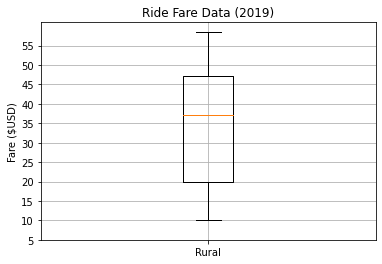

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [65]:
x_labels=['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_fare, labels=x_labels)
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(5, 56, step=5.0))
ax.grid()
plt.show()
print('Summary Statistics')
rural_fare.describe()

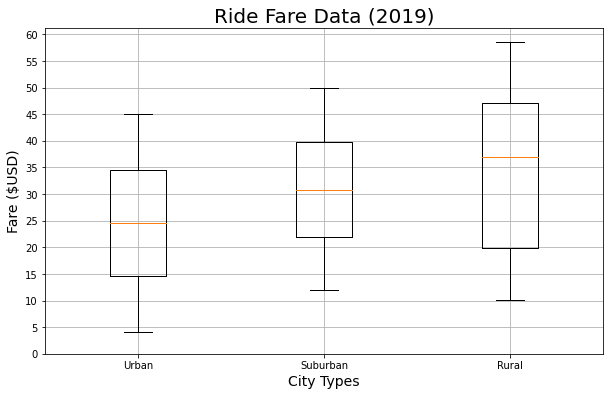

In [66]:
x_labels=['Urban', 'Suburban', 'Rural']
fare_data = [urban_fare, suburban_fare, rural_fare]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(fare_data, labels=x_labels)
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare ($USD)', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0, 61, step=5.0))
ax.grid()
plt.show()


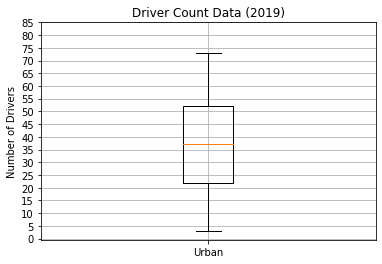

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [67]:
x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print('Summary Statistics')
urban_drivers.describe()

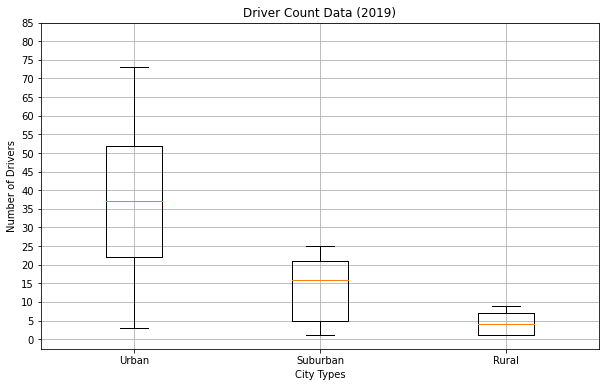

In [68]:
x_labels = ['Urban', 'Suburban', 'Rural']
driver_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(driver_data, labels=x_labels)
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_xlabel('City Types')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()


In [69]:
total_fares_by_type = pyber_data_df.groupby(['type']).sum()['fare']

total_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [70]:
total_fares = pyber_data_df['fare'].sum()

total_fares

63538.64

In [71]:
type_percents = total_fares_by_type / total_fares * 100

type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

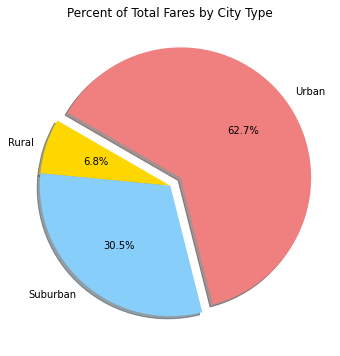

In [72]:
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(type_percents, 
    labels=['Rural', 'Suburban', 'Urban',],
    colors=['gold', 'lightskyblue', 'lightcoral'],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True,
    startangle=150)
ax.set_title('Percent of Total Fares by City Type')
mpl.rcParams['font.size'] = 15
plt.show()

In [73]:
prcnt_rides_by_type = pyber_data_df.groupby(['type']).count()['ride_id'] / pyber_data_df['ride_id'].count() * 100

prcnt_rides_by_type

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

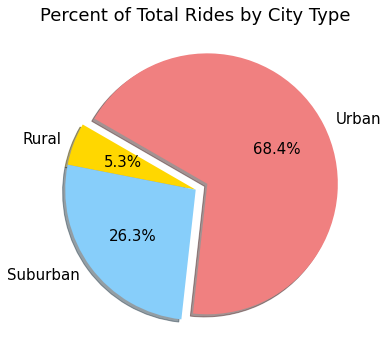

In [74]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(prcnt_rides_by_type, 
    labels=['Rural', 'Suburban', 'Urban',],
    colors=['gold', 'lightskyblue', 'lightcoral'],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True,
    startangle=150)
ax.set_title('Percent of Total Rides by City Type')
mpl.rcParams['font.size'] = 15
plt.show()

In [75]:
prcnt_drivers_by_type = city_data_df.groupby(['type']).sum()['driver_count'] / city_data_df['driver_count'].sum() * 100

prcnt_drivers_by_type

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

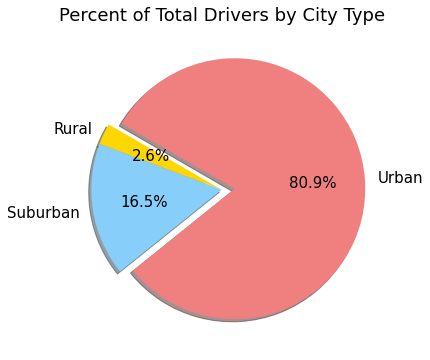

In [76]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(prcnt_drivers_by_type, 
    labels=['Rural', 'Suburban', 'Urban',],
    colors=['gold', 'lightskyblue', 'lightcoral'],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True,
    startangle=150)
ax.set_title('Percent of Total Drivers by City Type')
mpl.rcParams['font.size'] = 12
plt.show()

In [77]:
#1. Find total drivers, total fares, and total number of rides for each city type

total_drivers_by_type = city_data_df.groupby(['type']).sum()['driver_count']

total_rides_by_type = pyber_data_df.groupby(['type']).count()['ride_id']

#total_fares_by_type


In [78]:
#2. Average fare per ride

fare_per_ride_avg = total_fares_by_type / total_rides_by_type

fare_per_ride_avg

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [79]:
#3. Average fair per driver

fare_per_driver_avg = total_fares_by_type / total_drivers_by_type

fare_per_driver_avg

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [80]:
#4. Create PyBer Summary DataFrame

pyber_summary_df = pd.DataFrame(
            {'Total Rides': total_rides_by_type, 
            'Total Drivers': total_drivers_by_type, 
            'Total Fares': total_fares_by_type, 
            'Average Fare per Ride': fare_per_ride_avg, 
            'Average Fare per Driver': fare_per_driver_avg})

pyber_summary_df.index.name = None
                                

pyber_summary_df                                

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [81]:
#5. Format data in DataFrame

pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].map('{:,}'.format)
pyber_summary_df['Total Drivers'] = pyber_summary_df['Total Drivers'].map('{:,}'.format)
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare per Ride'] = pyber_summary_df['Average Fare per Ride'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare per Driver'] = pyber_summary_df['Average Fare per Driver'].map('${:,.2f}'.format)

pyber_summary_df


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [82]:
#6. New data frame with type and date as indexes and fare for data points
#6a. Reset index

total_fares_df = pd.DataFrame()
total_fares_df = pyber_data_df.groupby(['type', 'date']).sum()['fare']
total_fares_df = total_fares_df.reset_index()

total_fares_df



,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [83]:
#6b. Assign date to index and type to columns using pivot function

total_fares_df = total_fares_df.pivot(index='date', columns='type', values='fare')

total_fares_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [84]:
#7. New data frame using loc method on date range

total_fares_df2 = total_fares_df.loc['2019-01-01':'2019-04-29']

total_fares_df2.tail()

type,Rural,Suburban,Urban
date,,,
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43
2019-04-28 17:38:09,NaN,34.87,NaN
2019-04-28 19:35:03,NaN,16.96,NaN


In [85]:
#8. Convert index to datetime data type

total_fares_df2.index = pd.to_datetime(total_fares_df2.index)

In [86]:
total_fares_df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [87]:
#9. Use resample to sort date into weekly bins and sum() the fares for each week

total_fares_df3 = total_fares_df2.resample('W').sum()

total_fares_df3

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [145]:
q1 = total_fares_df3.quantile(.25)

In [146]:
total_fares_df3.quantile()

type
Rural        191.85
Suburban    1045.06
Urban       2218.20
Name: 0.5, dtype: float64

In [147]:
q3 = total_fares_df3.quantile(.75)

In [149]:
IQR = q3-q1

IQR

type
Rural       128.80
Suburban    224.00
Urban       306.27
dtype: float64

In [156]:
lower_bound = q1 - (1.5 * IQR)

lower_bound

type
Rural        -18.060
Suburban     589.270
Urban       1591.025
dtype: float64

In [157]:
upper_bound = q3 + (1.5 * IQR)

upper_bound

type
Rural        497.140
Suburban    1485.270
Urban       2816.105
dtype: float64

In [133]:
from matplotlib import style
style.use('fivethirtyeight')

import datetime as dt

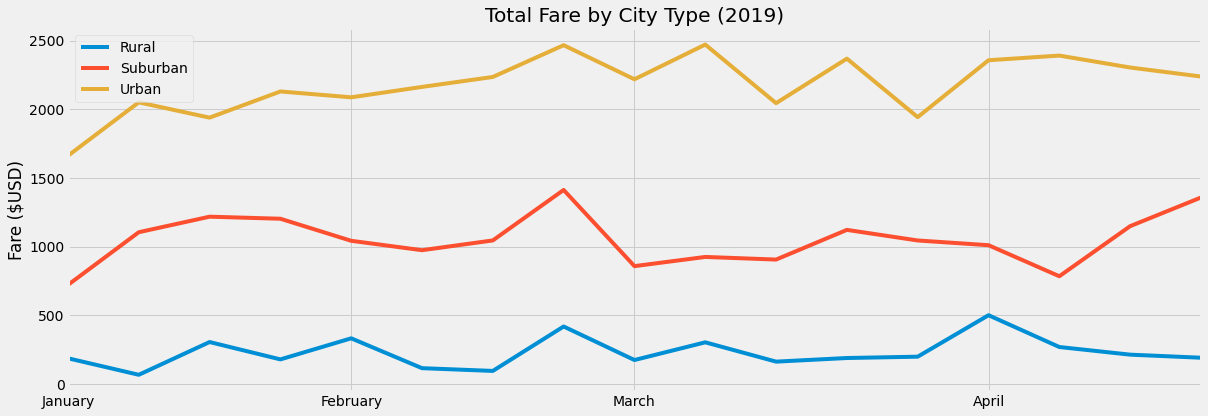

In [135]:
fig, ax = plt.subplots(figsize=(17, 6))

x_min = dt.date(2019, 1, 6)
x_max = dt.date(2019, 4, 28)
legend_labels = ['Rural', 'Suburban', 'Urban']
x_ticks = ['2019-01-06', '2019-02-03', '2019-03-03', '2019-04-07']
x_tick_labels = ['January', 'February', 'March', 'April']

ax.plot(total_fares_df3)
ax.set_title('Total Fare by City Type (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_tick_labels)
ax.set_xlim(x_min, x_max)


ax.legend(legend_labels)
plt.tight_layout()

plt.show()
